In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 5 - Principal and Minor Eigenvectors of a Matrix Sequence
# OJA - Used on Simulated Non-Stationary Data
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Number of samples N and dimension D
nDim     = 10
nEA      = 4
nEpochs  = 3


In [4]:
# Generate the covX1 and covX2 random matrices
covX1 = 2 * np.array([ \
[ 0.0910, 0.0380,-0.0530,-0.0050, 0.0100,-0.1360, 0.1550, 0.0300, 0.0020, 0.0320 ], \
[ 0.0380, 0.3730, 0.0180,-0.0280,-0.0110,-0.3670, 0.1540,-0.0570,-0.0310,-0.0650 ], \
[-0.0530, 0.0180, 1.4300, 0.0170, 0.0550,-0.4500,-0.0380,-0.2980,-0.0410,-0.0300 ], \
[-0.0050,-0.0280, 0.0170, 0.0840,-0.0050, 0.0160, 0.0420,-0.0220, 0.0010, 0.0050 ], \
[ 0.0100,-0.0110, 0.0550,-0.0050, 0.0710, 0.0880, 0.0580,-0.0690,-0.0080, 0.0030 ], \
[-0.1360,-0.3670,-0.4500, 0.0160, 0.0880, 5.7200,-0.5440,-0.2480, 0.0050, 0.0950 ], \
[ 0.1550, 0.1540,-0.0380, 0.0420, 0.0580,-0.5440, 2.7500,-0.3430,-0.0110,-0.1200 ], \
[ 0.0300,-0.0570,-0.2980,-0.0220,-0.0690,-0.2480,-0.3430, 1.4500, 0.0780, 0.0280 ], \
[ 0.0020,-0.0310,-0.0410, 0.0010,-0.0080, 0.0050,-0.0110, 0.0780, 0.0670, 0.0150 ], \
[ 0.0320,-0.0650,-0.0300, 0.0050, 0.0030, 0.0950,-0.1200, 0.0280, 0.0150, 0.3410 ]])
covX2 = 4*np.array([ \
[ 0.0900, 0.0010,-0.0080,-0.1910,-0.0070, 0.0410,-0.0300,-0.0580, 0.0220, 0.0320 ], \
[ 0.0010, 0.0920,-0.0110, 0.0080,-0.0140,-0.0020, 0.0120,-0.0100,-0.0210,-0.0020 ], \
[-0.0080,-0.0110, 0.0820, 0.0820, 0.0140,-0.0200,-0.0580, 0.1050, 0.0040, 0.0230 ], \
[-0.1910, 0.0080, 0.0820, 5.6800,-0.0960,-0.0150, 0.6460, 0.2190,-0.2380, 0.2180 ], \
[-0.0070,-0.0140, 0.0140,-0.0960, 0.0760,-0.0350,-0.0400,-0.0230, 0.0270,-0.0140 ], \
[ 0.0410,-0.0020,-0.0200,-0.0150,-0.0350, 0.4580, 0.1380,-0.2510, 0.0120, 0.0390 ], \
[-0.0300, 0.0120,-0.0580, 0.6460,-0.0400, 0.1380, 1.8200,-0.1830,-0.0020, 0.1170 ], \
[-0.0580,-0.0100, 0.1050, 0.2190,-0.0230,-0.2510,-0.1830, 4.0700,-0.4640, 0.1470 ], \
[ 0.0220,-0.0210, 0.0040,-0.2380, 0.0270, 0.0120,-0.0020,-0.4640, 0.2630, 0.0540 ], \
[ 0.0320,-0.0020, 0.0230, 0.2180,-0.0140, 0.0390, 0.1170, 0.1470, 0.0540, 0.3870 ]])

covX2/4

array([[ 9.00e-02,  1.00e-03, -8.00e-03, -1.91e-01, -7.00e-03,  4.10e-02,
        -3.00e-02, -5.80e-02,  2.20e-02,  3.20e-02],
       [ 1.00e-03,  9.20e-02, -1.10e-02,  8.00e-03, -1.40e-02, -2.00e-03,
         1.20e-02, -1.00e-02, -2.10e-02, -2.00e-03],
       [-8.00e-03, -1.10e-02,  8.20e-02,  8.20e-02,  1.40e-02, -2.00e-02,
        -5.80e-02,  1.05e-01,  4.00e-03,  2.30e-02],
       [-1.91e-01,  8.00e-03,  8.20e-02,  5.68e+00, -9.60e-02, -1.50e-02,
         6.46e-01,  2.19e-01, -2.38e-01,  2.18e-01],
       [-7.00e-03, -1.40e-02,  1.40e-02, -9.60e-02,  7.60e-02, -3.50e-02,
        -4.00e-02, -2.30e-02,  2.70e-02, -1.40e-02],
       [ 4.10e-02, -2.00e-03, -2.00e-02, -1.50e-02, -3.50e-02,  4.58e-01,
         1.38e-01, -2.51e-01,  1.20e-02,  3.90e-02],
       [-3.00e-02,  1.20e-02, -5.80e-02,  6.46e-01, -4.00e-02,  1.38e-01,
         1.82e+00, -1.83e-01, -2.00e-03,  1.17e-01],
       [-5.80e-02, -1.00e-02,  1.05e-01,  2.19e-01, -2.30e-02, -2.51e-01,
        -1.83e-01,  4.07e+00, -4.64e-

In [37]:
# Generate the data
from scipy.linalg import eigh

# Number of samples N and dimension D
nSamples1 = 3000
nSamples2 = 15000
nSamples = nSamples1 + nSamples2
nDim = 10
nEA = 4
nEpochs = 1

eigvals1, eigvecs1 = eigh(covX1)
print("eigvals1 =\n", eigvals1[::-1])
V1 = np.fliplr(eigvecs1)
D1  = np.diag(np.sqrt(eigvals1[::-1]))

eigvals2, eigvecs2 = eigh(covX2)
print("eigvals2 =\n", eigvals2[::-1])
V2 = np.fliplr(eigvecs2)
D2  = np.diag(np.sqrt(eigvals2[::-1]))

np.random.seed(1)
R1 = np.random.normal(0, 1, (nDim, nSamples1))
R2 = np.random.normal(0, 1, (nDim, nSamples2))
X1 = V1 @ D1 @ R1
X2 = V2 @ D2 @ R2
XX = np.concatenate((X1,X2),axis=1)


eigvals1 =
 [11.79962474  5.56438753  3.41750617  2.0588796   0.78726809  0.5877646
  0.17426915  0.14232806  0.12129678  0.10067527]
eigvals2 =
 [23.36623305 16.56981781  6.86112929  1.83785592  1.54517663  0.70102746
  0.38511074  0.31010599  0.26774266  0.22780046]


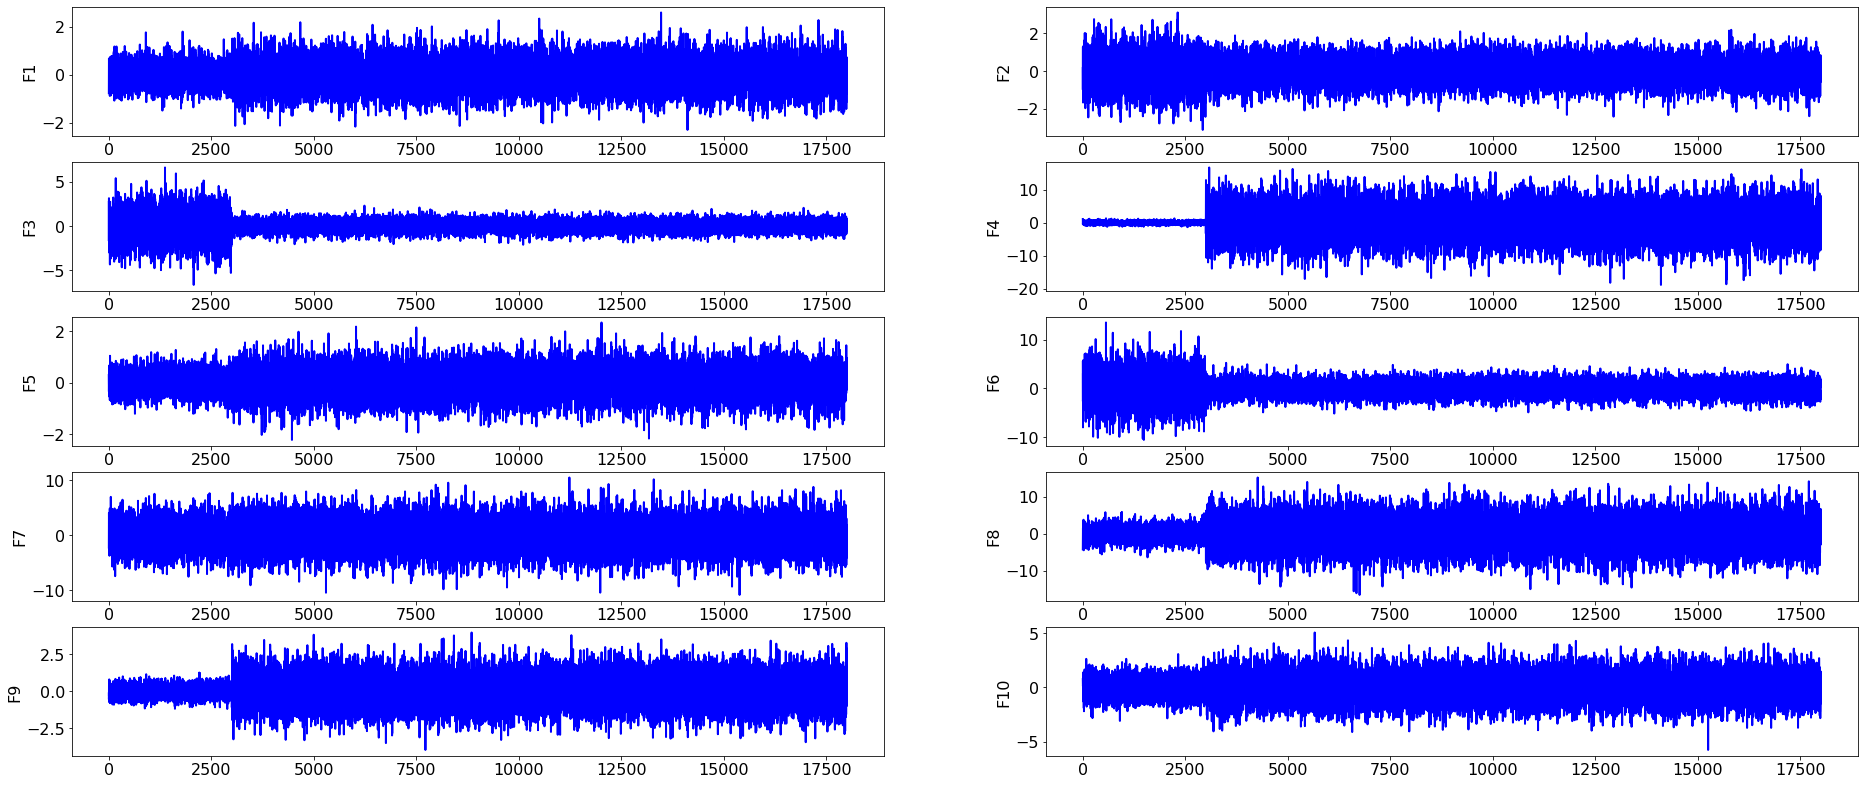

In [38]:
# Plot the data
dataset = pd.DataFrame(XX.T, columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

In [39]:
# Square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX1 = (X1 @ X1.T) / nSamples1
corX2 = (X2 @ X2.T) / nSamples2

# Eigenvalues and eigenvectors of corX1
eigvals1, eigvecs1 = eigh(corX1)
print("eigvals1 =\n", eigvals1[::-1])
EstV1 = np.fliplr(eigvecs1)
EstD1  = np.diag(eigvals1[::-1])

# Eigenvalues and eigenvectors of corX1
eigvals2, eigvecs2 = eigh(corX2)
print("eigvals2 =\n", eigvals2[::-1])
EstV2 = np.fliplr(eigvecs2)
EstD2  = np.diag(eigvals2[::-1])


eigvals1 =
 [11.69257214  5.65189889  3.47052508  2.00221828  0.79057168  0.59336334
  0.17494591  0.13936598  0.12063126  0.09813878]
eigvals2 =
 [23.4660765  16.76986175  6.76591431  1.82371057  1.53161123  0.69790849
  0.38132743  0.30646757  0.26736105  0.22738449]


In [40]:
# Adaptive algorithm
from numpy import linalg as la

A  = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
W2 = 0.1 * np.ones(shape=(nDim,nEA)) # weight vectors of all algorithms
cos_t2 = np.zeros(shape=(nEA, nSamples*nEpochs)) # cosine error

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter

        # Update data correlation matrix A with current sample x
        if (iter < nSamples1):
            x = X1[:,iter]
        else:
            x = X2[:,iter-nSamples1]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)

        # Deflated Gradient Descent
        W2 = W2 + (1/(100 + cnt))*(A @ W2 - W2 @ np.triu(W2.T @ A @ W2))

        for i in range(nEA):
            u2 = W2[:,i]/la.norm(W2[:,i])
            u2 = u2.reshape(nDim,1)
            if (iter < nSamples1):
                vi = EstV1[:,i].reshape(nDim,1)
            else:
                vi = EstV2[:,i].reshape(nDim,1)
            cos_t2[i,cnt] = abs(u2.T @ vi)


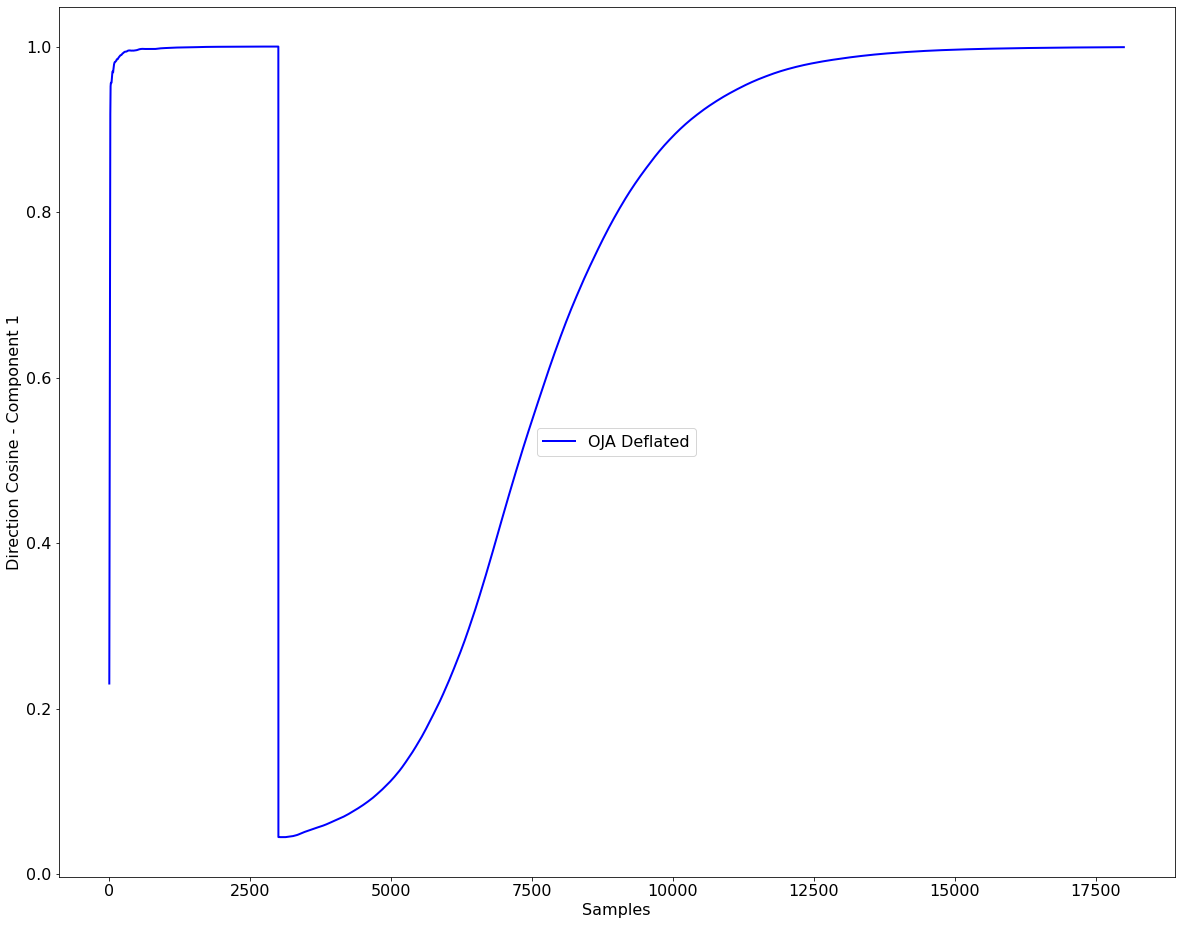

In [44]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(1, 1, 1)
plt.plot(cos_t2[0,:], lw=2, color='b', label='OJA Deflated')
plt.ylabel('Direction Cosine - Component 1')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()